# Восстановление золота из руды

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откроем-и-изучим-файлы" data-toc-modified-id="Откроем-и-изучим-файлы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем и изучим файлы</a></span></li><li><span><a href="#Расчёт-эффективности-обогащения-золота" data-toc-modified-id="Расчёт-эффективности-обогащения-золота-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Расчёт эффективности обогащения золота</a></span></li><li><span><a href="#Анализ-признаков-обучающей-и-тестовой-выборок" data-toc-modified-id="Анализ-признаков-обучающей-и-тестовой-выборок-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков обучающей и тестовой выборок</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-изменения-концентрации-элементов-на-каждом-этапе" data-toc-modified-id="Анализ-изменения-концентрации-элементов-на-каждом-этапе-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ изменения концентрации элементов на каждом этапе</a></span></li><li><span><a href="#Анализ-распределения-размеров-гранул-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Анализ-распределения-размеров-гранул-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ распределения размеров гранул на обучающей и тестовой выборках</a></span></li><li><span><a href="#Анализ-суммарных-концентраций" data-toc-modified-id="Анализ-суммарных-концентраций-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ суммарных концентраций</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Линейная-модель" data-toc-modified-id="Линейная-модель-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная модель</a></span></li><li><span><a href="#Деревья" data-toc-modified-id="Деревья-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Деревья</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Проверка-модели-на-тестовых-данных" data-toc-modified-id="Проверка-модели-на-тестовых-данных-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка модели на тестовых данных</a></span></li><li><span><a href="#Сравнение-с-константной-моделью" data-toc-modified-id="Сравнение-с-константной-моделью-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Сравнение с константной моделью</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Описание исследования

Данные находятся в трёх файлах:
- gold_recovery_train_new.csv — обучающая выборка;
- gold_recovery_test_new.csv — тестовая выборка;
- gold_recovery_full_new.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.
Это сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, необходимо проверить их на корректность.

# Цель исследования

Подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.

# Задачи исследования

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

#  Описание данных

__Технологический процесс__

- Rougher feed — исходное сырье
    - Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant 
    - Xanthate **— ксантогенат (промотер, или активатор флотации);
    - Sulphate — сульфат (на данном производстве сульфид натрия);
    - Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота


__Параметры этапов__
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

__Наименование признаков__

Наименование признаков должно быть такое:

`[этап].[тип_параметра].[название_параметра]`

Пример: `rougher.input.feed_ag`

Возможные значения для блока [этап]:

- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока `[тип_параметра]`:

- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

## Подготовка данных

### Откроем и изучим файлы

**Импортируем все необходимые библиотеки**

In [1]:
import numpy as np
import pandas as pd


from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

from collections import Counter

RANDOM_STATE = 42

**Рассмотрим основные показатели датасетов.**

**Тренировочный датасет**

In [2]:
pd.set_option('display.max_rows', None)
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date', parse_dates=True)
display(df_train.head())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                     

**Тестовый датасет**

In [5]:
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date', parse_dates=True)
df_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

**Полный датасет**

In [8]:
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date', parse_dates=True)
df_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [9]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

**Таким образом, мы видим, что тренировочный и общий датасеты состоят из 87 столбцов, 86 из которых имеют тип float64, 1 - тип object, тестовый датасет содержит 53 столбца: 52 - float64, 1 - object. Eдинственный столбец с датой содержит уникальные значения и в дальнейшем будет использоваться в качестве индекса. В данных есть пропуски, которые потребуют обработки перед обучением модели. Анализ значений после применения к выборкам метода describe показывает, что некоторые строки с концентрацией элементов содержать нулевые значения. Это может быть аномалией данных, требующей обработки**

### Расчёт эффективности обогащения золота

**Для рассчёта обогащения золота нам потребуется воспользоваться следующей формулой:**
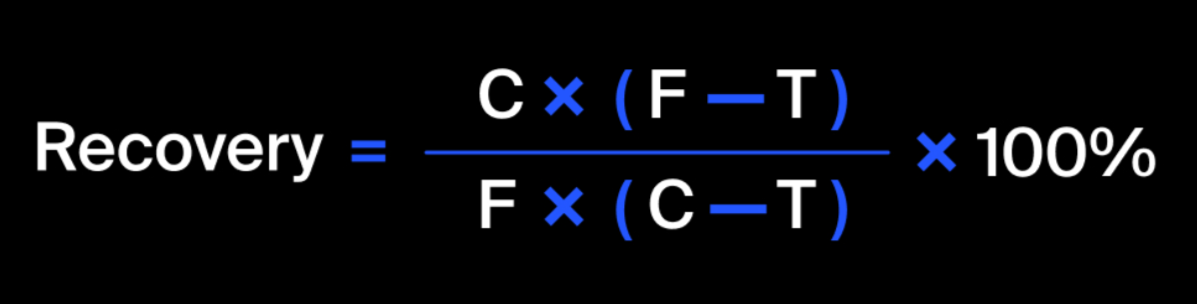

**Где:**
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

**Рассчёты нам необходимо произвести по показателю rougher.output.recovery. В таком случае аргументами функции выступят:**
- C = rougher.output.concentrate_au
- F = rougher.input.feed_au
- T = rougher.output.tail_au

In [11]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']
recovery = ((C * (F - T)) / (F * (C - T))) * 100

**Проверим точность наших рассчётов через метрику MAE (mean absolute error).**

In [12]:
print('MAE:', mean_absolute_error(df_train['rougher.output.recovery'], recovery))

MAE: 9.73512347450521e-15


**Показатель MAE близок к 0, соответственно точность расчётов по вышеописанной формуле весьма высока.**

### Анализ признаков обучающей и тестовой выборок

**Обучающий и тестовый датасеты имеют различное количество признаков. Обучающий - 87 признаков, тестовый - 53 признака. Выясним, какие признаки отсутствуют в тестовом датасете.**

In [13]:
missing_features = set(df_train.columns).difference(set(df_test.columns))
print('Количество отсутствующих столбцов: {}'.format(len(missing_features)))
print('Перечень столбцов:' + '\n' + '\n'.join(missing_features))

Количество отсутствующих столбцов: 34
Перечень столбцов:
primary_cleaner.output.concentrate_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
final.output.tail_sol
rougher.output.tail_ag
secondary_cleaner.output.tail_sol
primary_cleaner.output.tail_ag
rougher.calculation.sulfate_to_au_concentrate
final.output.tail_au
final.output.concentrate_pb
rougher.output.tail_pb
rougher.output.tail_au
final.output.concentrate_sol
rougher.output.concentrate_au
primary_cleaner.output.tail_au
rougher.calculation.floatbank10_sulfate_to_au_feed
primary_cleaner.output.concentrate_pb
rougher.output.tail_sol
final.output.concentrate_au
primary_cleaner.output.concentrate_sol
rougher.calculation.au_pb_ratio
rougher.output.recovery
final.output.concentrate_ag
primary_cleaner.output.tail_sol
rougher.calculation.floatbank11_sulfate_to_au_feed
final.output.recovery
secondary_cleaner.output.tail_au
primary_cleaner.output.tail_pb
final.output.tail_ag
final.output.tail_pb
rougher.output.concentr

**Как видно из списка выше, в тестовом датасете отсутствуют признаки, относящиеся к типу параметров output (параметры продукта) и calculation (расчётные характеристики), в том числе целевые признаки: rougher.output.recovery и final.output.recovery.**

### Предобработка данных

**Для обработки пропусков нам полезно будет понимать, какой процент строки с None значениями составляют от общего количества строк.**

In [14]:
for df, name in zip([df_train, df_test, df_full], ['Обучающий', 'Тестовый', 'Полный']):
    print('{}: {}%'.format(name, round((df.isna().any(axis=1).sum() / len(df.index)) * 100, 2)))

Обучающий: 22.14%
Тестовый: 1.15%
Полный: 17.21%


**Чтобы проверить, что данные представляют собой последовательные процессы, проверим их на монотонность. Это позволит выбрать более корректный подход к обработке пропусков.**

In [15]:
for df in df_train, df_test, df_full:
    print(df.index.is_monotonic)

True
True
True


**Суммарно пропуски составляют довольно существенный процент обучающего и общего датасетов. Некорректная замена пропусков может исказить 17% общего датасета. При этом данные монотонны и соседние по времени параметры похожи. Прибегнем к заполнению данных предыдущими значениями.**

In [16]:
df_full = df_full.bfill()
df_train = df_train.bfill()
df_test = df_test.bfill()
for df in df_train, df_test, df_full:
    print(df.isnull().values.any())

False
False
False


**По результатам этапа обработки данных было проанализировано 3 датасета. Подтверждена корректность расчёта эффективности обогащения. В обучающем и тестовом датасетах было скорректировано количество колонок. Также из 3-х датасетов были удалены пропуски. Столбец с датой был установлен в качестве индекса датасетов.**

## Анализ данных

### Анализ изменения концентрации элементов на каждом этапе

**Нам известно 4 показателя, характеризующих концентрацию элементов на различных этапах:**
- rougher.input.feed
- rougher.output.concentrate
- primary_cleaner.output.concentrat
- final.output.concentrate

**Напишем функцию, которая будет готовить визуализацию концентрации элементов**

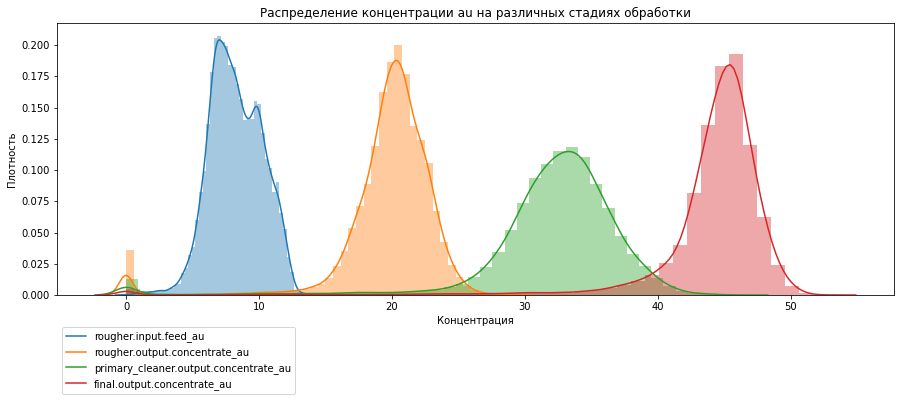

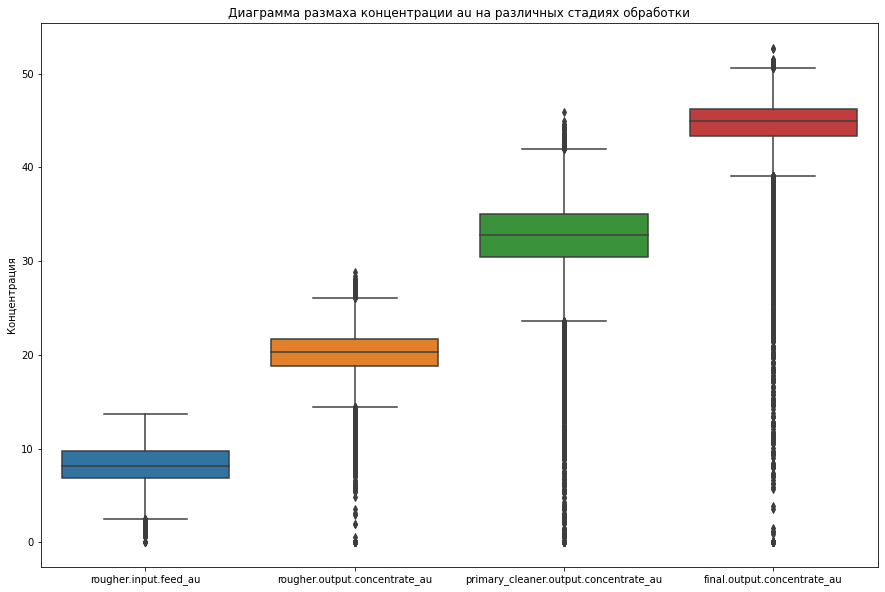

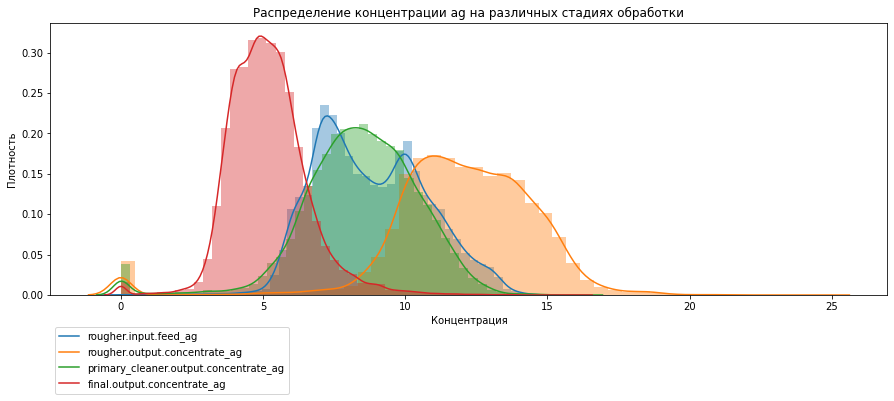

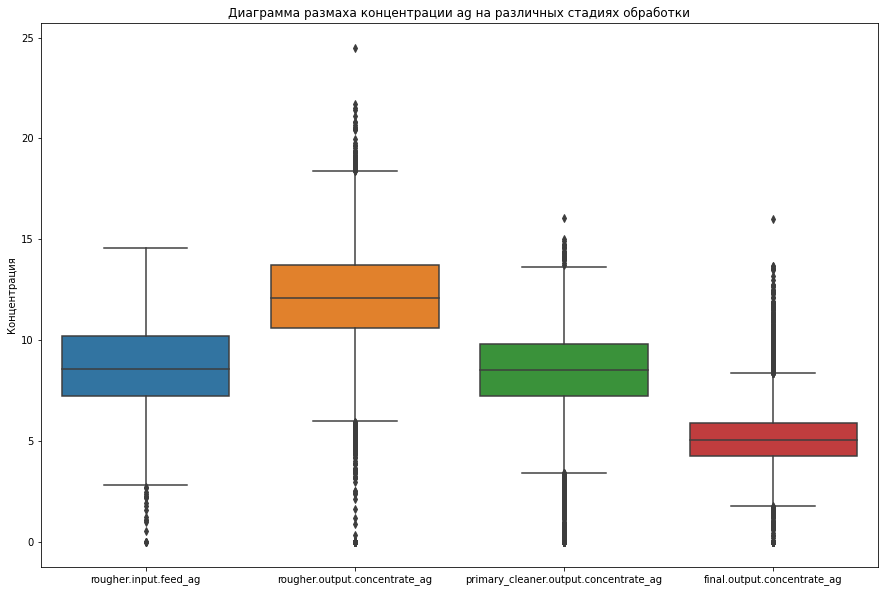

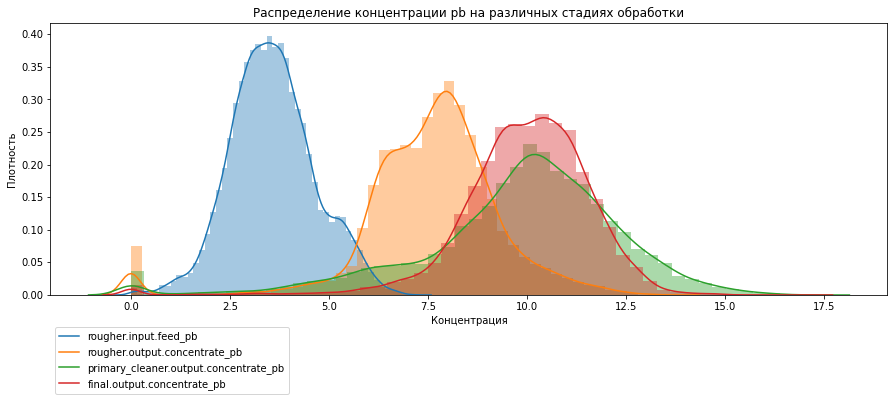

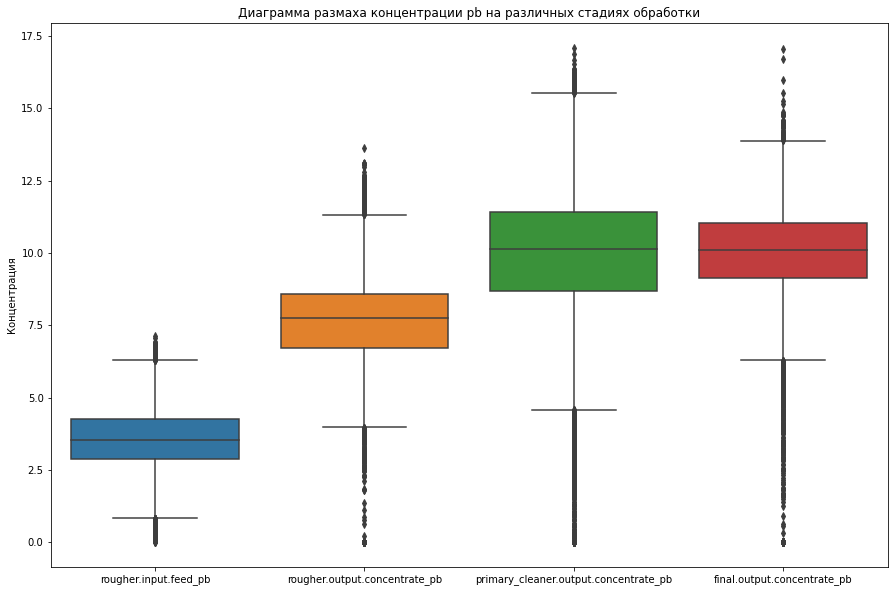

In [17]:
def show_dist_graph(elem):
    """Accepts the name of the element (e.x. 'au').
    Shows distribution graphs for the following columns:
    rougher.input.feed,
    rougher.output.concentrate,
    primary_cleaner.output.concentrate,
    final.output.concentrate
    """
    plt.figure(figsize=(15,5))
    cols = ['rougher.input.feed_{}'.format(elem),
            'rougher.output.concentrate_{}'.format(elem),
            'primary_cleaner.output.concentrate_{}'.format(elem),
            'final.output.concentrate_{}'.format(elem)]
    for col in cols:
        sns.distplot(df_full[col], kde=True, kde_kws= {'label': col})
        plt.legend(bbox_to_anchor=(0, -0.1), loc=2)
        plt.xlabel('Концентрация')
        plt.ylabel('Плотность')

def show_box_plot(elem):
    """Accepts the name of the element (e.x. 'au').
    Shows boxplots for the following columns:
    rougher.input.feed,
    rougher.output.concentrate,
    primary_cleaner.output.concentrate,
    final.output.concentrate
    """
    plt.figure(figsize=(15,10))
    cols = ['rougher.input.feed_{}'.format(elem),
            'rougher.output.concentrate_{}'.format(elem),
            'primary_cleaner.output.concentrate_{}'.format(elem),
            'final.output.concentrate_{}'.format(elem)]
    sns.boxplot(data=df_full[cols])
    plt.ylabel('Концентрация')

for elem in ('au', 'ag', 'pb'):
    show_dist_graph(elem)
    plt.title(label='Распределение концентрации {} на различных стадиях обработки'.format(elem))
    plt.show()
    show_box_plot(elem)
    plt.title(label='Диаграмма размаха концентрации {} на различных стадиях обработки'.format(elem))
    plt.show()

**Как можно заметить, концентрация золота и свинца в среднем возрастает, тогда как концентрация серебра наоборот снижается в финальном концентрате. При этом выбросы преимущественно расположены в первом квартиле и содержат нулевые значения. Такие значения являются аномальными и они должны быть удалены**

In [18]:
THRESHOLD = 0.005
print('Размер обучающей выборки до: {}'.format(df_train.shape))
print('Размер тестовой выборки до: {}'.format(df_test.shape))
for elem in ('au', 'ag', 'pb'):
    cols = ['rougher.input.feed_{}'.format(elem),
            'rougher.output.concentrate_{}'.format(elem),
            'primary_cleaner.output.concentrate_{}'.format(elem),
            'final.output.concentrate_{}'.format(elem)]
    for col in cols:
        df_full_test = df_full.loc[df_test.index]
        df_train = df_train[df_train[col] > THRESHOLD]
        df_test = df_test[df_full_test[col] > THRESHOLD]
print('Размер обучающей выборки после: {}'.format(df_train.shape))
print('Размер тестовой выборки после: {}'.format(df_test.shape))

Размер обучающей выборки до: (14149, 86)
Размер тестовой выборки до: (5290, 52)
Размер обучающей выборки после: (13722, 86)
Размер тестовой выборки после: (5123, 52)


### Анализ распределения размеров гранул на обучающей и тестовой выборках

**Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.**

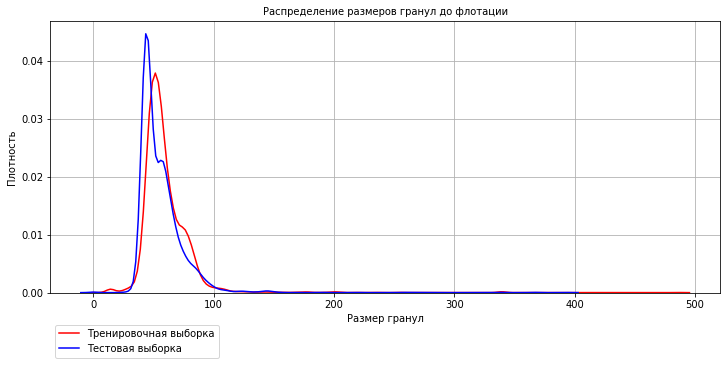

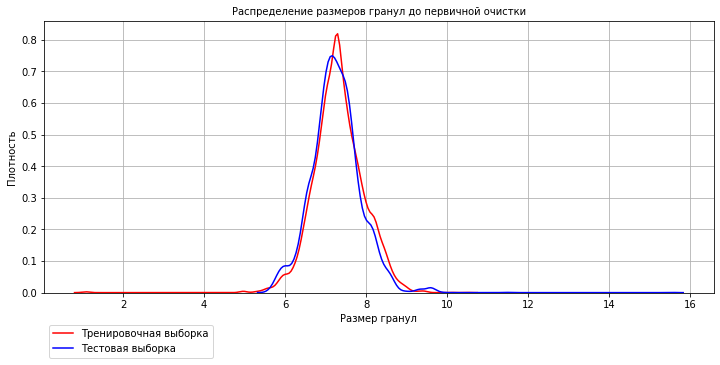

In [19]:
size_dict = {'Распределение размеров гранул до флотации': 'rougher.input.feed_size',
             'Распределение размеров гранул до первичной очистки': 'primary_cleaner.input.feed_size'}
for key, value in size_dict.items():
    plt.figure(figsize=(12,5))
    sns.kdeplot(df_train[value], color='red')
    sns.kdeplot(df_test[value], color='blue')
    plt.grid(visible=True)
    plt.legend(['Тренировочная выборка', 'Тестовая выборка'], bbox_to_anchor=(0, -0.1), loc=2)
    plt.title(label=key, fontsize=10)
    plt.xlabel('Размер гранул')
    plt.ylabel('Плотность')
    plt.show()

**Визуально графики крайне схожи, соответственно незначительные отличия в распределениях не должны сильно исказить прогнозы моделей.**

### Анализ суммарных концентраций

**Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах**

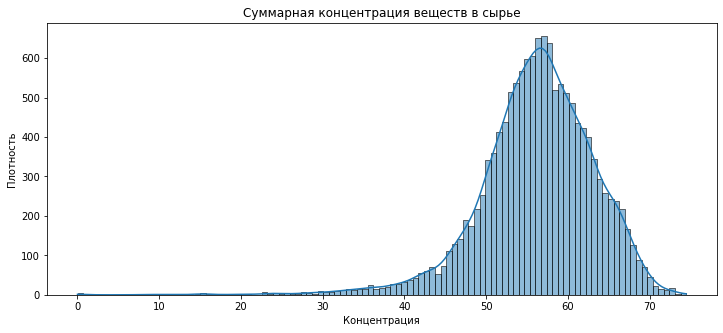

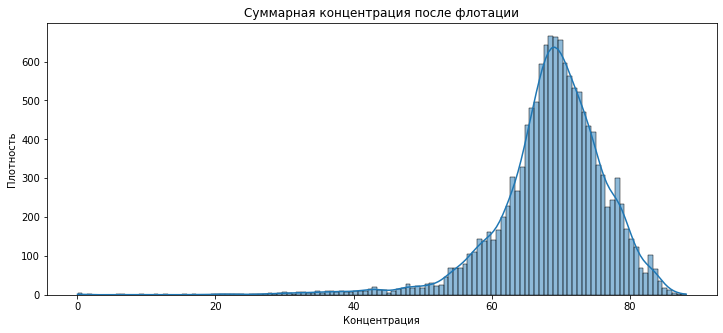

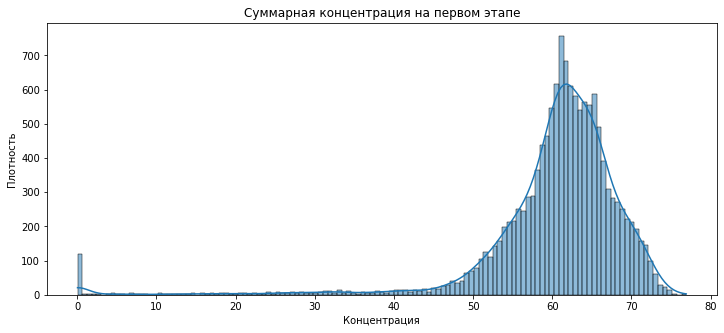

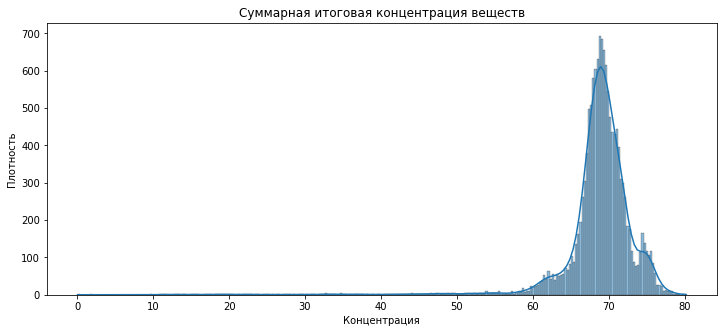

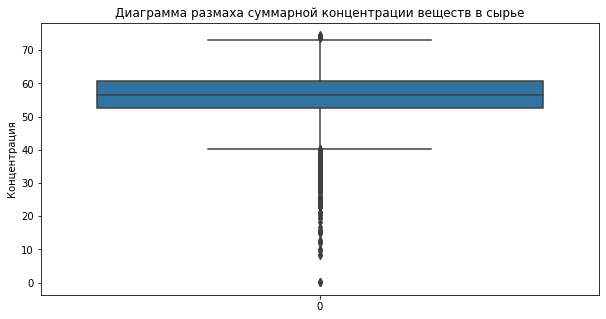

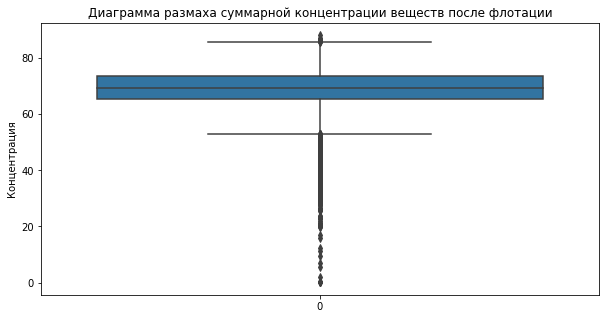

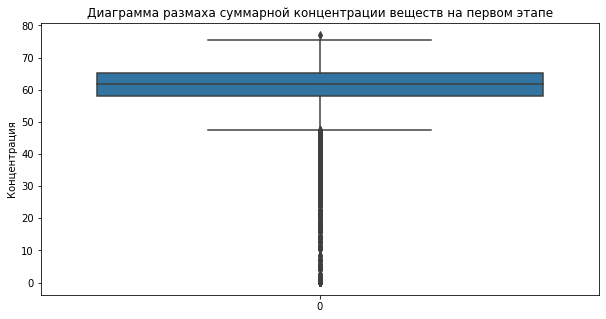

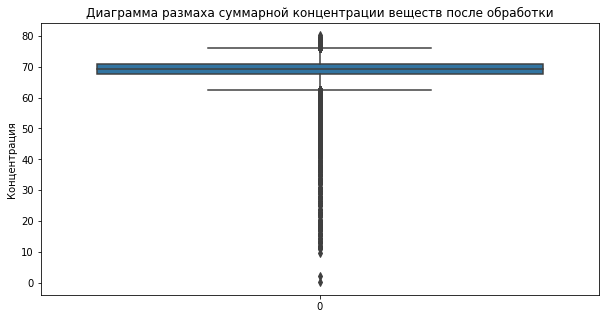

In [20]:
concentrate_list = [
    [
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol'
    ],
    [
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol'
    ],
    [
    'primary_cleaner.output.concentrate_au',
    'primary_cleaner.output.concentrate_ag',
    'primary_cleaner.output.concentrate_pb',
    'primary_cleaner.output.concentrate_sol'
    ],
    [
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol'
    ]]
titles = [
    'Суммарная концентрация веществ в сырье',
    'Суммарная концентрация после флотации',
    'Суммарная концентрация на первом этапе',
    'Суммарная итоговая концентрация веществ',
]
titles_boxplots = [
    'Диаграмма размаха суммарной концентрации веществ в сырье',
    'Диаграмма размаха суммарной концентрации веществ после флотации',
    'Диаграмма размаха суммарной концентрации веществ на первом этапе',
    'Диаграмма размаха суммарной концентрации веществ после обработки',
]


for concentrate, title in zip(concentrate_list, titles):
    plt.figure(figsize=(12,5))
    plt.title(title)
    plt.xlabel('Концентрация')
    plt.ylabel('Плотность')
    sns.histplot(df_train[concentrate].sum(1), kde=True )
    plt.show()
for concentrate, title in zip(concentrate_list, titles_boxplots):
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df_train[concentrate].sum(1))
    plt.ylabel('Концентрация')
    plt.title(label=title)
plt.show()

**На графиках мы видим, что суммарная концентрация веществ увеличивается по факту прохождения процесса технологической очистки золота.**

**Добавим в тестовый датасет целевые признаки rougher.output.recovery и final.output.recovery**

In [21]:
df_test = df_test.join(df_full[['rougher.output.recovery', 'final.output.recovery']], on='date')

**Для корректной работы модели стоит удалить из обучающей выборки лишние признаки, отсутствующие также в тестовой выборке.**

In [22]:
df_train = df_train[list(df_test.columns)]

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13722 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               13722 non-null  float64
 1   primary_cleaner.input.depressant            13722 non-null  float64
 2   primary_cleaner.input.feed_size             13722 non-null  float64
 3   primary_cleaner.input.xanthate              13722 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      13722 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    13722 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      13722 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    13722 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      13722 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    1372

**Проверим на мультиколлинеарность обучающую выборку и исключим столбцы, где корреляция между признаками и целевыми показателями крайне высока, больше 0.9**

In [24]:
df_train.corr(method='kendall')

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
primary_cleaner.input.sulfate,1.000000,0.310553,0.099156,0.141773,0.024061,-0.014851,0.037898,-0.032526,0.043942,-0.017026,...,0.090811,-0.039704,0.001378,0.007218,0.006682,0.002348,-0.079352,-0.088966,0.301124,0.291998
primary_cleaner.input.depressant,0.310553,1.000000,0.095932,0.189091,-0.097671,0.045631,-0.065413,0.045988,-0.075541,0.051158,...,-0.082818,-0.195726,-0.171886,-0.079823,-0.139008,-0.073576,-0.112704,-0.074469,0.099867,0.120544
primary_cleaner.input.feed_size,0.099156,0.095932,1.000000,-0.017305,-0.073720,0.036772,-0.070320,0.049302,-0.093351,0.045299,...,-0.161705,-0.007284,-0.160476,0.070676,-0.174077,0.069290,0.103480,0.036020,-0.056688,0.023214
primary_cleaner.input.xanthate,0.141773,0.189091,-0.017305,1.000000,0.004732,0.000455,0.017549,-0.010108,-0.006595,-0.005911,...,0.008199,-0.223586,-0.057987,-0.137051,-0.052693,-0.136367,-0.147549,-0.048844,0.127537,0.153706
primary_cleaner.state.floatbank8_a_air,0.024061,-0.097671,-0.073720,0.004732,1.000000,0.057514,0.731952,0.037245,0.726275,0.059603,...,0.362290,0.186265,0.410527,0.172315,0.357639,0.170433,0.218520,0.031646,0.126979,0.108087
primary_cleaner.state.floatbank8_a_level,-0.014851,0.045631,0.036772,0.000455,0.057514,1.000000,0.052077,0.209513,0.053770,0.392816,...,0.024280,-0.000150,0.001089,0.093894,0.018703,0.068928,0.053888,0.162720,0.019158,0.061528
primary_cleaner.state.floatbank8_b_air,0.037898,-0.065413,-0.070320,0.017549,0.731952,0.052077,1.000000,0.035473,0.756891,0.058213,...,0.381850,0.153214,0.432891,0.184154,0.368579,0.188735,0.235529,0.016585,0.144556,0.120927
primary_cleaner.state.floatbank8_b_level,-0.032526,0.045988,0.049302,-0.010108,0.037245,0.209513,0.035473,1.000000,0.034152,0.284645,...,0.008406,-0.036883,-0.011786,-0.014459,0.007079,0.007444,0.065699,-0.006822,-0.000056,0.033065
primary_cleaner.state.floatbank8_c_air,0.043942,-0.075541,-0.093351,-0.006595,0.726275,0.053770,0.756891,0.034152,1.000000,0.059264,...,0.437965,0.165494,0.454132,0.164461,0.419541,0.167571,0.186613,0.015664,0.161335,0.114580
primary_cleaner.state.floatbank8_c_level,-0.017026,0.051158,0.045299,-0.005911,0.059603,0.392816,0.058213,0.284645,0.059264,1.000000,...,0.023289,-0.019631,0.001348,0.037322,0.017167,0.036942,0.069577,0.044033,0.020044,0.060967


In [25]:
corr = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1).corr(method='kendall')
corr_s = corr.unstack()
high_corr = dict()
for el in corr_s.index:
    if el[0] != el[1] and abs(corr_s[el]) >= 0.9:
        high_corr[tuple(el)] = corr_s[el]

features_to_drop = []
all_features = []
for key in high_corr.keys():
    all_features.extend(list(key))
num_of_occurance = dict(Counter(all_features))
drop_list = []
for key, _ in high_corr.items():
    if key[0] not in drop_list and key[1] not in drop_list:
        if num_of_occurance[key[0]] > num_of_occurance[key[1]]:
            drop_list.append(key[0])
        elif num_of_occurance[key[0]] <= num_of_occurance[key[1]]:
            drop_list.append(key[1])
print('Перечень признаков с самыми высокими показателями корреляции \
и с самой большой частотой встречаемости в парах коррелирующих признаков:')
drop_list

Перечень признаков с самыми высокими показателями корреляции и с самой большой частотой встречаемости в парах коррелирующих признаков:


['rougher.input.floatbank11_xanthate']

In [26]:
df_train = df_train.drop(drop_list, axis=1)
df_test = df_test.drop(drop_list, axis=1)
df_train.corr()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
primary_cleaner.input.sulfate,1.000000,0.490928,0.166434,0.255604,0.027336,-0.038411,0.050933,-0.034062,0.047935,-0.028416,...,0.103591,-0.057910,-0.011129,-0.038723,-0.005676,-0.033361,-0.114660,-0.152805,0.437681,0.400919
primary_cleaner.input.depressant,0.490928,1.000000,0.173200,0.269164,-0.151762,0.126820,-0.111964,0.142697,-0.125029,0.146247,...,-0.132717,-0.281658,-0.262683,-0.161204,-0.221990,-0.153977,-0.168927,-0.131156,0.134012,0.165903
primary_cleaner.input.feed_size,0.166434,0.173200,1.000000,-0.010926,-0.131973,0.078241,-0.131406,0.081007,-0.156747,0.079192,...,-0.256642,0.027336,-0.234014,0.127825,-0.220138,0.130055,0.143598,0.062719,-0.046308,0.071780
primary_cleaner.input.xanthate,0.255604,0.269164,-0.010926,1.000000,0.067535,0.020899,0.097602,0.017473,0.061740,0.015819,...,0.011921,-0.333277,-0.078311,-0.205674,-0.091536,-0.203736,-0.220510,-0.077962,0.184580,0.221091
primary_cleaner.state.floatbank8_a_air,0.027336,-0.151762,-0.131973,0.067535,1.000000,0.158788,0.943765,0.168613,0.933184,0.169047,...,0.519209,0.219612,0.551771,0.262693,0.497557,0.254649,0.309523,0.054787,0.203180,0.160828
primary_cleaner.state.floatbank8_a_level,-0.038411,0.126820,0.078241,0.020899,0.158788,1.000000,0.118650,0.977836,0.149884,0.964158,...,0.089650,-0.045108,0.004705,0.103193,0.064546,0.079621,0.172571,0.182450,0.016453,0.053155
primary_cleaner.state.floatbank8_b_air,0.050933,-0.111964,-0.131406,0.097602,0.943765,0.118650,1.000000,0.143795,0.939296,0.144925,...,0.516111,0.194316,0.551388,0.269869,0.483338,0.262403,0.310265,0.033291,0.228485,0.178593
primary_cleaner.state.floatbank8_b_level,-0.034062,0.142697,0.081007,0.017473,0.168613,0.977836,0.143795,1.000000,0.160324,0.968199,...,0.075505,-0.035312,-0.015126,0.116979,0.042240,0.092436,0.167641,0.187669,0.011902,0.046636
primary_cleaner.state.floatbank8_c_air,0.047935,-0.125029,-0.156747,0.061740,0.933184,0.149884,0.939296,0.160324,1.000000,0.162556,...,0.585797,0.208645,0.586597,0.227814,0.548713,0.229361,0.273093,0.041282,0.248402,0.166341
primary_cleaner.state.floatbank8_c_level,-0.028416,0.146247,0.079192,0.015819,0.169047,0.964158,0.144925,0.968199,0.162556,1.000000,...,0.076462,-0.039972,-0.014786,0.111112,0.040376,0.087589,0.162895,0.182550,0.017364,0.050215


**Из тестовой и обучающей выборки удалены признаки с самыми высокими показателями корреляции и с самой большой частотой встречаемости в парах коррелирующих признаков**

**Разделим тренировочные данные**

In [27]:
features_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1).reset_index(drop=True)
features_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1).reset_index(drop=True)

target_train_rougher = df_train['rougher.output.recovery'].reset_index(drop=True)
target_train_final = df_train['final.output.recovery'].reset_index(drop=True)

target_test_rougher = df_test['rougher.output.recovery'].reset_index(drop=True)
target_test_final = df_test['final.output.recovery'].reset_index(drop=True)

display(features_train.shape, target_train_rougher.shape, target_train_final.shape,
       features_test.shape, target_test_rougher.shape, target_test_final.shape)

(13722, 51)

(13722,)

(13722,)

(5123, 51)

(5123,)

(5123,)

**При обучении планируется использовать линейную модель. Для неё масштабируем входные признаки**

In [28]:
scaler = StandardScaler()
features_train_lr = scaler.fit_transform(features_train)
features_test_lr = scaler.transform(features_test)


## Модель

 **Напишем функцию для вычисления итоговой sMAPE**

In [29]:
def smape(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = (abs(y_true) + abs(y_pred)) / 2
    return np.mean(error / scale) * 100


def smape_total(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

In [30]:
scorer = make_scorer(smape, greater_is_better=False)

### Линейная модель

**rougher.output.recovery**

In [31]:
model_lr = LinearRegression(n_jobs=-1)
score_rougher_lr = -1 * cross_val_score(
    model_lr,
    features_train_lr,
    target_train_rougher,
    scoring=scorer,
    n_jobs=-1).mean()
print(f'Значение SMAPE для rougher.output.recovery на кросс-валидации: {score_rougher_lr}')

Значение SMAPE для rougher.output.recovery на кросс-валидации: 7.2342691064476075


**final.output.recovery**

In [32]:
score_final_lr = -1 * cross_val_score(
    model_lr,
    features_train_lr,
    target_train_final,
    scoring=scorer,
    n_jobs=-1,
    error_score='raise').mean()
print(f'Значение SMAPE для final.output.recovery: {score_final_lr}')

Значение SMAPE для final.output.recovery: 10.915940674922515


### Деревья

In [33]:
model_decision_tree = DecisionTreeRegressor(random_state=RANDOM_STATE)
decision_parameters = {
              "max_depth": range(2, 7),
              "min_samples_leaf": range(2, 8)
}

**rougher.output.recovery**

In [34]:
decision_grid_rougher = RandomizedSearchCV(
    estimator=model_decision_tree,
    param_distributions=decision_parameters,
    cv=3,
    scoring=scorer,
    n_iter = 20, 
    random_state=RANDOM_STATE
)
decision_grid_rougher.fit(features_train, target_train_rougher)
print(f'Гиперпараметры лучшей модели: {decision_grid_rougher.best_params_}') 
print(f'Значение SMAPE для rougher: {-1 * decision_grid_rougher.best_score_}')

Гиперпараметры лучшей модели: {'min_samples_leaf': 7, 'max_depth': 5}
Значение SMAPE для rougher: 8.039487669199898


**final.output.recovery**

In [35]:
decision_grid_final = RandomizedSearchCV(
    estimator=model_decision_tree,
    param_distributions=decision_parameters,
    cv=3,
    scoring=scorer,
    n_iter = 20, 
    random_state=RANDOM_STATE
)
decision_grid_final.fit(features_train, target_train_final)
print(f'Гиперпараметры лучшей модели: {decision_grid_final.best_params_}') 
print(f'Значение SMAPE для rougher: {-1 * decision_grid_final.best_score_}')

Гиперпараметры лучшей модели: {'min_samples_leaf': 2, 'max_depth': 2}
Значение SMAPE для rougher: 10.702653056803952


### Случайный лес

In [36]:
model_rfr = RandomForestRegressor(n_jobs=-1, random_state=RANDOM_STATE)
params={
    'max_depth': (None, *range(5, 9)), 
    'min_samples_split': range(6, 9),
    'min_samples_leaf': range(2, 5)
}

**rougher.output.recovery**

In [37]:
rfr_rougher = RandomizedSearchCV(
    model_rfr, 
    params, 
    scoring=scorer, 
    n_jobs=-1, 
    random_state=RANDOM_STATE
)
rfr_rougher.fit(features_train, target_train_rougher)
print(f'Гиперпараметры лучшей модели: {rfr_rougher.best_params_}') 
print(f'Значение SMAPE для rougher: {-1 * rfr_rougher.best_score_}') 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



**final.output.recovery**

In [ ]:
rfr_final = RandomizedSearchCV(
    model_rfr, 
    params, 
    scoring=scorer, 
    n_jobs=-1, 
    random_state=RANDOM_STATE
)
rfr_final.fit(features_train, target_train_final)
print(f'Гиперпараметры лучшей модели: {rfr_final.best_params_}') 
print(f'Значение SMAPE: {-1 * rfr_final.best_score_}') 

**Модель RandomForestRegressor показала наилучшие результаты для обоих таргетов.**

### Проверка модели на тестовых данных

**rougher.output.recovery**

In [ ]:
predict_rougher = rfr_rougher.predict(features_test)
smape_rougher = smape(target_test_rougher, predict_rougher)
print(f'SMAPE на тестовой выборке для rougher.output.recovery: {round(smape_rougher, 2)}')

**final.output.recovery**

In [ ]:
predict_final = rfr_final.predict(features_test)
smape_final = smape(target_test_final, predict_final)
print(f'SMAPE на тестовой выборке для final.output.recovery: {round(smape_final, 2)}')

In [ ]:
print(f'Итоговый показатель SMAPE = {round(smape_total(smape_rougher, smape_final), 2)}')

### Сравнение с константной моделью

**rougher.output.recovery**

In [ ]:
model_dr = DummyRegressor()
model_dr.fit(features_train, target_train_rougher)
smape_rougher_dr = smape(target_test_rougher, model_dr.predict(features_test))
print(f'Значение SMAPE константной модели для таргета rougher.output.recovery: {smape_rougher_dr}') 

**final.output.recovery**

In [ ]:
model_df = DummyRegressor()
model_df.fit(features_train, target_train_final)
smape_final_df = smape(target_test_final, model_df.predict(features_test))
print(f'Значение SMAPE константной модели для таргета final.output.recovery: {smape_final_df}') 

In [ ]:
print(f'Итоговая SMAPE = {round(smape_total(smape_rougher_dr, smape_final_df), 2)}')

**Выбранные модели показали худший результат, чем константная.**

## Общий вывод

- Концентрация каждого из металлов меняется в зависимости от этапа очистки: концентрация золота постепенно увеличивается с каждым этапом, серебра — падает, а свинца растёт на первых 3-х этапах.

- Размеры гранул примерно одинаково распределены в обучающей и тестовой выборках.
- В данных обнаружены аномалии: нулевые суммарные концентрации веществ, что может свидетельствовать о некорректной работе некоторых датчиков или алгаритмов анализа
- В ходе сравнения регрессионных моделей (LinearRegression, DecisionTreeRegressor , RandomForestRegressor) выбрана модель с наилучшими показателями прогнозов: RandomForestRegressor
- Обученная модель RandomForestRegressor показала свою адекватность на тестовой выборке: итоговая ошибка обученной модели составляет 7.32%, baseline модели - 7.78%.